# MLP

## Czym jest sieć neuronowa

Realnie:
To model matematyczny, który ma imitować działanie ludzkiego mózgu. Model składa się z warstw, które najcześciej są przekształceniami liniowymi lub funkcjami aktywacji. Każda warstwa składa się z neuronów. Wartości neuronów w każdej wartwie obliczamy na podstawie poprzedniej wg. wzoru:

$$
n^l_c = \phi(∑ w^{l-1}_{i,c}n^{l-1}_i +b^{l-1}_c)
$$
Czyli po ludzku, bierzemy wszystkie neurony z poprzedniej warstwy każdy mnożymy przez jakąś skalarną wagę. Sumujemy, dodajemy bias i przepuszczamy przez funkcję aktywacji. Okazuje się, że taki wzorek zwija się do czegoś ładniejszego, jeśli popatrzymy na warstwy globalnie. Każda warstwa dostaje na wejściu wektor i zwraca wektor który jest wektorem wejściowym kolejnej warstwy. Każdą warstwę (l) możemy zapisać:
$$
w_l(\mathbf{x}) = \phi ( \mathbf{Ax+b})
$$
gdzie $\phi$ to funkcja aktywacji, A macierz wag i b wektor biasu. To jest to samo co widzimy wyżej, bo po prostu obliczenia się skracją.

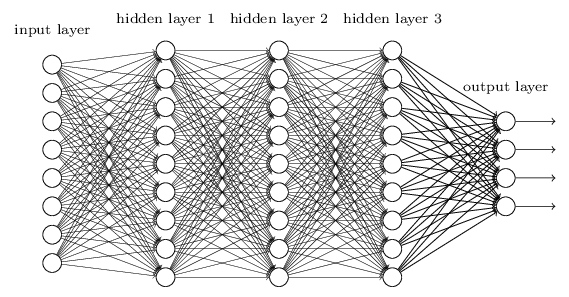


Dlaczego taki model? bo:

**Twierdzenie Cybenki** (ang. Cybenko's Theorem). Opublikowane w 1989 roku przez George'a Cybenkę, twierdzenie to formalnie wykazuje, że jednowarstwowa sieć neuronowa z funkcją aktywacji typu sigmoidalnego jest w stanie aproksymować dowolną funkcję ciągłą na zwartym podzbiorze przestrzeni $\mathbb{R}^N$
z dowolnie małym błędem, pod warunkiem odpowiednio dużej liczby neuronów w warstwie ukrytej.

*Ciekawostka*: można też w oparciu o inne twierdzenia np. Kolmogorov-Arnold Representation Theorem, tzw KANy.

## Jak działają sieci neuronowe



Przyjrzymy się jak wyglądają sieci neuronowe. Świetnie to obrazuje stronka [TensorFlow Playground](https://playground.tensorflow.org/).

Zanim przejdziemy dalej, przyjrzymy się znanej nam już regresji logistycznej: [Playground - Regresja logistyczna](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=10&networkShape=&seed=0.92264&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

Dana jest wzorem:

$$
\hat{y} = \sigma(W x + b)
$$

gdzie:
 - $n$ - ilość cech wejściowych
 - $x \in \mathbb{R}^{n \times 1}$ - wektor cech wejściowych,
 - $W \in \mathbb{R}^{1 \times n}$ - wagi,
 - $b \in \mathbb{R}$ - bias,
 - $\sigma$ - funkcja aktywacji sigmoid,
 - $\hat{y} \in \mathbb{R}$ - wyjście modelu.

czyli równoważnie:

$$
\hat{y} = \sigma\left(
\begin{bmatrix}
w_1 & w_2 & \dots & w_n
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
+ b
\right)
$$

Czasami jednak tak prosty model nie wystarcza. Nie wykryje on bardziej skomplikowanych, nieliniowych zależności. W tym mogą pomóc sieci neuronowe.


### Forward Pass

Jak działa taka sieć? Działa warstwowo - dane wejściowe są przetwarzane przez kolejne warstwy neuronów, z których każdy wykonuje proste obliczenia: mnoży wejścia przez wagi, dodaje bias i przepuszcza wynik przez funkcję aktywacji. To tzw. forward pass, czyli przejście w przód.

Każdą warstwę można sobie wyobrazić jako regresję przyjmującą jako wejście wartości z poprzedniej warstwy i zwracającą ileś wartości ze swojej warstwy (poprzez mnożenie odpowiednich macierzy), a następnie zastosowanie do tego odpowiedniej funkcji aktywacji.



Możemy to rozważyć na przykładzie prostej [sieci neuronowej](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16808&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):

Architektura: `(2 wejścia) → (4 neurony) → [tanh] → (2 neurony) → [tanh] → (1 wyjście) → [sigmoid]`

Załóżmy, że naszym wejściem jest $x =
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$.
Wagi pierwszej warstwy to macierz

$$
W^{(1)} = \begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} \\
w_{31}^{(1)} & w_{32}^{(1)} \\
w_{41}^{(1)} & w_{42}^{(1)}
\end{bmatrix}, \quad b^{(1)} = \begin{bmatrix} b_1^{(1)} \\ b_2^{(1)} \\ b_3^{(1)} \\ b_4^{(1)} \end{bmatrix}
$$

Pierwsza warstwa wykonuje operację:

$$
z^{(1)} = W^{(1)} x + b^{(1)}, \quad h^{(1)} = \tanh(z^{(1)})
$$

$$
\text{czyli: } h^{(1)} = \begin{bmatrix}
\tanh(w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)}) \\
\tanh(w_{21}^{(1)} x_1 + w_{22}^{(1)} x_2 + b_2^{(1)}) \\
\tanh(w_{31}^{(1)} x_1 + w_{32}^{(1)} x_2 + b_3^{(1)}) \\
\tanh(w_{41}^{(1)} x_1 + w_{42}^{(1)} x_2 + b_4^{(1)})
\end{bmatrix}
$$

Otrzymany wektor \$h^{(1)}\$ (rozmiaru 4) staje się wejściem do drugiej warstwy, której parametry to:

$$
W^{(2)} = \begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)} & w_{14}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} & w_{23}^{(2)} & w_{24}^{(2)}
\end{bmatrix}, \quad b^{(2)} = \begin{bmatrix} b_1^{(2)} \\ b_2^{(2)} \end{bmatrix}
$$

Podobnie jak wcześniej:

$$
z^{(2)} = W^{(2)} h^{(1)} + b^{(2)}, \quad h^{(2)} = \tanh(z^{(2)}) \text{ (rozmiaru 2)}
$$

Na końcu mamy warstwę wyjściową:

$$
W^{(3)} = \begin{bmatrix} w_1^{(3)} & w_2^{(3)} \end{bmatrix}, \quad b^{(3)} = b
$$

$$
z^{(3)} = W^{(3)} h^{(2)} + b^{(3)}, \quad \hat{y} = \sigma(z^{(3)})
$$

Tak więc cały model można zapisać jako zagnieżdżenie funkcji:

$$
\hat{y} = \sigma \left( W^{(3)} \cdot \tanh \left( W^{(2)} \cdot \tanh \left( W^{(1)} x + b^{(1)} \right) + b^{(2)} \right) + b^{(3)} \right)
$$

Dzięki zastosowaniu wielu warstw i nieliniowych funkcji aktywacji, sieć może aproksymować złożone funkcje i klasyfikować dane, których nie potrafiłby rozdzielić pojedynczy klasyfikator liniowy.


**Pozostaje jeszcze kilka problemów**:


### Backward Pass

Skąd wziąć wagi? Nie ma na to niestety ładnego wzorku (jak np. w regresjii liniowej), tylko musimy je wyliczyć używając Gradient Descent. Do tego jednak potrzebujemy gradientów, które w głębokich sieciach neuronowych dość trudno wliczyć. Zajmuje się tym potężny algortm backpropagation (tzw. backprop):
https://www.youtube.com/watch?v=Ilg3gGewQ5U

*Uwaga*: Więcej o backpropagation będzie w trzecim semestrze, więc w tym momencie nie wchodzimy za bardzo w ten temat

*Ciekawostka*: Bliższe architekturowo mózgowi (i wg. niektórych benchmarków lepsze) są tzw. spiking neural networks, jednak dla nich właśnie backprop nie działa więc aktualnie nie da się ich używać (w innych miejscach niż MNIST)

### Funkcje aktywacji

**Nieliniowość**
Generalnie, przekształcenia liniowe są fajne, były na algebrze możemy je liczyć, składać etc, jednak nie wystarczają do dobrej reprezentacji danych. Dlatego ludzie wymyślili funkcje aktywacji, takie żeby sieć się lepiej uczyła. Jak tego nie użyjemy to lekki disaster się dzieje (patrz playground). Najpopularniejsze są poniżej.

Każda ma plusy i minusy,

***Uwaga***: Tworzenie kilku warstw neuronowych bez funkcji aktywacji pomiędzy jest równoważne po prostu stworzeniem jednej warstwy

Załóżmy, że mamy dwie warstwy liniowe:

1. Pierwsza warstwa:
   $h_1 = W_1 x + b_1$

2. Druga warstwa:
   $h_2 = W_2 h_1 + b_2 = W_2(W_1 x + b_1) + b_2 = W_2 W_1 x + W_2 b_1 + b_2$

To nadal jest funkcja liniowa względem wejścia $x$:
$z = W x + b$, gdzie:

* $W = W_2 W_1$
* $b = W_2 b_1 + b_2$

Poniżej jest implementacja i wizualizacja kilku najpopularniejszych funkcji aktywacji

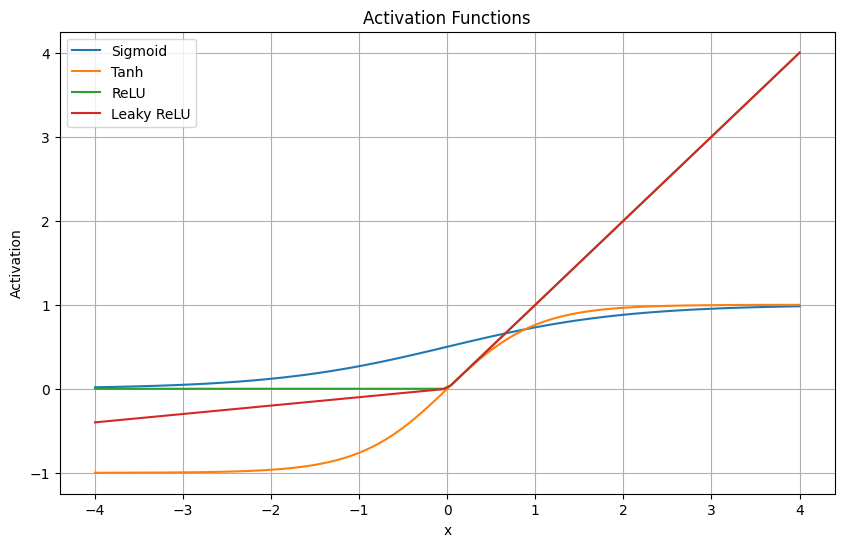

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(0, x)

def leaky_relu(x):
  return np.maximum(0.1 * x, x)


x = np.linspace(-4, 4, 100)

plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')

plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

### Funkcje lossu

Funkcje lossu pojawiły się już na jednym ze wcześniejszych wykładów, ale trzeba pamiętać o tym jak ważne jest dobranie odpowiedniej funkcji do odpowiedniego problemu

### Pętla treningowa

Czyli, podsumowując. Mamy sieć neuronową która składa się z kilku warstw, gdzie każda warstwa ma jakąś funkcję aktywacji. Możemy na tej sieci robić forward i backward pass, etc. Dlatego podsumujmy jak wygląda trenowanie:
- Inicjalizujemy sieć losowymi wartościami
- Rozpoczynamy pętlę treningową
- Tworzymy predykcję (forward pass, y_pred = model(X_batch))
- Liczymy funkcję lossu (loss = criterion(y_pred, y_batch))
- Liczymy gradienty (backward pass,  loss.backward())
- Robimy krok optimazera (optimizer.step())
- Zerujemy gradienty (optimizer.zero_grad())
- Wracamy na początek pętli.

          

## Sieć z Autogradem

Spróbujmy teraz zaimplementować [sieć z przykładu](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16808&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) w Pythonie z użyciem automatycznego różniczkowania (`Autograd`):

In [2]:
import autograd.numpy as np
from autograd import grad
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# 1. Dane (takie jak na playgroundzie – okręgi)
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
y = y.reshape(-1, 1)

# 2. Podział na zbiór train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Funkcje aktywacji
def tanh(x):
  return np.tanh(x)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 4. Inicjalizacja wag
#    Prosta inicjalizacja: bias = 0, a wagi z rozkładu normalnego
def init_weights(sizes):
    weights = [np.random.randn(input_dim, output_dim) for input_dim, output_dim in zip(sizes[:-1], sizes[1:])]
    biases = [np.zeros((1, output_dim)) for output_dim in sizes[1:]]
    return weights, biases

# 5. Forward pass
def forward(X, weights, biases):
    a = X
    # Propagacja przez warstwy ukryte z tanh
    for i in range(len(weights) - 1):
        z = np.dot(a, weights[i]) + biases[i]
        a = tanh(z)
    # Wyjście z aktywacją sigmoid
    z = np.dot(a, weights[-1]) + biases[-1]
    return sigmoid(z)

# 6. Funkcja kosztu (Binary Cross-Entropy)
def loss_fn(params, X, y_true):
    y_pred = forward(X, *params)
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# 7. Gradient funkcji kosztu (wraz z przejściem forward po sieci)
grad_loss = grad(loss_fn, argnum=0)  # obliczamy po 1. argumencie (params)

# 8. Hiperparametry
sizes = [2, 4, 2, 1]  # architektura sieci
n_epochs = 1000
lr = 0.1

# 9. Inicjalizacja parametrów
weights, biases = init_weights(sizes)
params = (weights, biases)

# 10. Trening
def train(n_epochs, lr):
    for epoch in range(n_epochs):
        # Wyliczenie gradientu:
        #  Jest to jeden z ważniejszych i cięższych w zrozumieniu kroków w MLP.
        #  Korzystając z obecnych parametrów, robimy forward pass przez sieć
        #  i liczymy gradienty dla każdej wagi i bias. Działa to podobnie jak w
        #  gradient descent na regresji liniowej, ale na dużą większą skalę korzystając
        #  z algorytmu backpropagation.
        grads = grad_loss(params, X_train, y_train)

        # Gradient descent update
        #  Dzięki policzonym gradientom, możemy wykonać krok spadku gradientowego.
        #  W większości przypadków korzystamy z optymalizatorów zamiast
        #  klasycznego gradient descent, ale zasada pozostaje ta sama.
        for i in range(len(params[0])):
            params[0][i] -= lr * grads[0][i]  # zaktualizuj weights
            params[1][i] -= lr * grads[1][i]  # zaktualizuj biases

        # Wizualizacja uczenia
        if epoch % 100 == 0:
            current_loss = loss_fn(params, X_train, y_train)
            print(f"Epoch {epoch}, Loss: {current_loss:.4f}")

train(n_epochs, lr)

# 11. Ewaluacja
y_pred = forward(X_test, *params) > 0.5
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Epoch 0, Loss: 0.7937
Epoch 100, Loss: 0.6247
Epoch 200, Loss: 0.5006
Epoch 300, Loss: 0.3290
Epoch 400, Loss: 0.2008
Epoch 500, Loss: 0.1343
Epoch 600, Loss: 0.1011
Epoch 700, Loss: 0.0823
Epoch 800, Loss: 0.0704
Epoch 900, Loss: 0.0622
Test Accuracy: 0.99


Podobnie jak na stronce zaprezentujmy decision boundary naszego modelu:

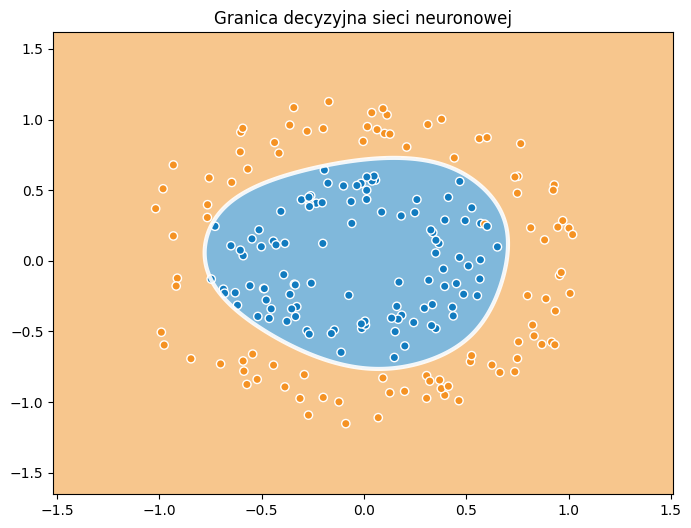

In [3]:
def plot_decision_boundary(X, y, params, h=0.01):
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  grid = np.c_[xx.ravel(), yy.ravel()]
  Z = forward(grid, *params)
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=ListedColormap(["#F6B871", "#61A7D3"]), alpha=0.8)
  plt.contour(xx, yy, Z, levels=[0.5], colors='white', linewidths=3, alpha=0.9)
  plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=ListedColormap(["#F59223", "#117BBF"]), marker='o', label="Test", edgecolors='white')
  plt.title("Granica decyzyjna sieci neuronowej")
  plt.grid(False)
  plt.show()

plot_decision_boundary(X_test, y_test, params)

Accuracy jest na poziomie 99% i wygląda to całkiem podobnie do tego na stronce - udało nam się poprawnie wytrenować prostą sieć neuronową prawie od zera! Sprawdźmy jeszcze jak wyglądają wagi poszczególnych neuronów:

In [4]:
def print_network_params(params):
    weights, biases = params
    print("Model's parameters:\n")

    for i, (w, b) in enumerate(zip(weights, biases)):
        print(f"Layer {i + 1}:")
        print(f"  Weights: (shape {w.shape}):")
        print(w)
        print(f"  Biases: (shape {b.shape}):")
        print(b)
        print("-" * 40)

print_network_params(params)

Model's parameters:

Layer 1:
  Weights: (shape (2, 4)):
[[ 1.68139684 -2.28349435 -0.70963628  0.04968483]
 [ 1.99077033  0.47138636  2.35541179  0.02605216]]
  Biases: (shape (1, 4)):
[[ 1.17334838  1.14391742 -1.1387656  -1.03069278]]
----------------------------------------
Layer 2:
  Weights: (shape (4, 2)):
[[ 1.91428409  1.91501885]
 [ 2.41673145 -0.2297732 ]
 [-1.95425813 -2.05182965]
 [ 2.20332569  1.27076516]]
  Biases: (shape (1, 2)):
[[-1.19905818  0.45211504]]
----------------------------------------
Layer 3:
  Weights: (shape (2, 1)):
[[4.73020102]
 [2.19962359]]
  Biases: (shape (1, 1)):
[[-1.26729178]]
----------------------------------------


Korzystając ze wzorku wyprowadzonego wyżej i tych parametrów $W, b$ możnaby teraz nawet ręcznie policzyć predykcję $\hat{y}$ dla dowolnego punktu $[x_1, x_2]$.

## Wstęp do Pytorcha


PyTorch ma wiele funkcji, które są bardzo podobne do tych z NumPy, dzięki czemu jeśli zna się NumPy, to korzystanie z PyTorch staje się dość intuicyjne.

Przykłady podobieństw:

* `np.sum()` → `torch.sum()`
* `np.mean()` → `torch.mean()`
* `np.reshape()` → `torch.reshape()`
* `np.zeros()` → `torch.zeros()`
* `np.ones()` → `torch.ones()`

Różnice tkwią głównie w obsłudze gradientów. Każdy tensor w PyTorch może przechowywać informacje o gradientach, które są używane do obliczania pochodnych w trakcie procesu uczenia modelu. Kiedy tworzysz tensor w PyTorch z argumentem `requires_grad=True`, to każda operacja wykonana na tym tensorze śledzi zależności (operacje), aby w razie potrzeby obliczyć gradienty przy propagacji wstecznej (backpropagation).

**Automatyczne obliczanie gradientów:**

   * NumPy nie śledzi gradientów. Kiedy chcesz obliczyć pochodne w NumPy, musisz to zrobić ręcznie (lub z użyciem zewnętrznych bibliotek).
   * W PyTorch, tensor z `requires_grad=True` automatycznie śledzi operacje, a po wykonaniu operacji na takim tensorze, można łatwo obliczyć gradienty za pomocą `tensor.backward()`.

Zobaczmy na przykład:

Załóżmy, że mamy funkcję $f(x) = x^2$ i chcemy obliczyć jej pochodną w punkcie $x = 2$. W NumPy musielibyśmy zrobić to ręcznie, obliczając pochodną jako $f'(x) = 2x$. W PyTorch za pomocą `requires_grad=True` możemy po prostu wywołać `backward()` na tensorze, a PyTorch obliczy gradienty automatycznie.

In [5]:
import torch

# Tworzymy tensor z requires_grad=True, aby śledzić operacje na tym tensorze
x = torch.tensor(2.0, requires_grad=True)

# Definiujemy funkcję f(x) = x^2
y = x ** 2

# Obliczamy gradienty
y.backward()

# Wyświetlamy gradient (pochodną funkcji w punkcie x=2)
print(f"Gradient f'(x) w punkcie x=2: {x.grad}")

Gradient f'(x) w punkcie x=2: 4.0


Można w ten sposób oczywiście obliczać gradienty dużo bardziej skomplikowanych funkcji, w naszym przypadku będą to funkcję lossu takie jak Binary Cross-Entropy.

Przyjrzyjmy się teraz implementacji tego samego modelu co wcześniej w PyTorch

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader

# Dane takie same jak wcześniej
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
y = y.reshape(-1, 1)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2)

# Tworzenie tensorów z wektorów numpy
# .float() konwertuje na tensory typu float32 (inaczej byłby typ double i wywaliłby się błąd)
# .reshape(-1, 1) zmienia shape każdego TODO Gdyby było więcej
X_train = torch.from_numpy(X_train_np).float()
y_train = torch.from_numpy(y_train_np).float().reshape(-1, 1)
X_test = torch.from_numpy(X_test_np).float()
y_test = torch.from_numpy(y_test_np).float().reshape(-1, 1)

# Tworzenie datasetu i dataloadera
# TensorDataset łączy dane X i y w jeden obiekt
# DataLoader umożliwia iterację po danych w mini-batchach rozmiarach batch_size
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)

# Definicja modelu za pomocą nn.Sequential
#  Kolejno: Linear -> Tanh -> Linear -> Tanh -> Linear -> Sigmoid
model = nn.Sequential(
    nn.Linear(2, 4),    # Warstwa wejściowa (2 -> 4)
    nn.Tanh(),          # Funkcja aktywacji Tanh
    nn.Linear(4, 2),    # Warstwa ukryta (4 -> 2)
    nn.Tanh(),          # Funkcja aktywacji Tanh
    nn.Linear(2, 1),    # Warstwa wyjściowa (2 -> 1)
    nn.Sigmoid()        # Funkcja aktywacji Sigmoid (odpowiednia do klasyfikacji binarnej)
)

# Hiperparametry i inicjalizacja optymalizatora
lr = 0.1
n_epochs = 1000
criterion = nn.BCELoss()  # Funkcja kosztu dla klasyfikacji binarnej (Binary Cross-Entropy Loss)
optimizer = optim.SGD(model.parameters(), lr=lr)  # Optymalizator SGD (Stochastic Gradient Descent)

# Pętla treningowa
def train(n_epochs, lr):
  for epoch in range(n_epochs):
      model.train()  # Ustawiamy model w tryb treningowy
      loss_sum = 0.0
      # Przechodzimy mini-batchami po dataloaderze, czyli całym zbiorze treningowym podzielonego na małe części
      for X_batch, y_batch in dataloader_train:
          optimizer.zero_grad()                # zerowanie gradientów (inaczej będą się akumulować)
          y_pred = model(X_batch)              # forward pass (przejście przez każdą warstwę modelu)
          loss = criterion(y_pred, y_batch)    # obliczenie funkcji lossu (stworzenie grafu obliczeniowego)
          loss.backward()                      # backward pass (liczenie gradientów dla każdego parametru)
          optimizer.step()                     # aktualizacja wag (na podstawie policzonych gradientów
          loss_sum += loss.item() * X_batch.size(0) # sumowanie lossu (w celu wizualizacji)

      # Średnia strata na epokę (w celu wizualizacji)
      loss_sum /= len(dataset_train)
      if epoch % 100 == 0:
          print(f"Epoch {epoch}, Loss: {loss_sum:.4f}")

train(n_epochs, lr)

# Ewaluacja modelu na zbiorze testowym
model.eval()  # Ustawiamy model w tryb ewaluacji (wyłączamy np. dropout, batch normalization)
with torch.no_grad():  # Nie obliczamy gradientów, ponieważ przeprowadzamy tylko testowanie
    y_pred_test = model(X_test)  # Predykcja dla zbioru testowego
    y_pred_label = (y_pred_test.numpy() > 0.5).astype(int)  # Przemiana wyniku w klasy (0 lub 1)

# Obliczenie dokładności modelu na zbiorze testowym
acc = accuracy_score(y_test, y_pred_label)
print(f"Test Accuracy: {acc:.2f}")

Epoch 0, Loss: 0.6996
Epoch 100, Loss: 0.0402
Epoch 200, Loss: 0.0191
Epoch 300, Loss: 0.0147
Epoch 400, Loss: 0.0121
Epoch 500, Loss: 0.0122
Epoch 600, Loss: 0.0088
Epoch 700, Loss: 0.0106
Epoch 800, Loss: 0.0112
Epoch 900, Loss: 0.0130
Test Accuracy: 1.00


## Zadania

#### Zadanie 1.


Napisz z palca wagi dla xora

In [7]:
import numpy as np

weights_hidden = np.array() # Wpisz wagi


biases_hidden = np.array() # Wpisz wagi

weights_output = np.array() # Wpisz wagi

bias_output = # Wpisz wagi

def predict(x):
    hidden_layer_input = np.dot(x, weights_hidden) + biases_hidden
    hidden_layer_output = relu(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
    output_layer_output = relu(output_layer_input)

    return output_layer_output

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_outputs = np.array([0, 1, 1, 0])


print("Predictions:")
for i in range(len(inputs)):
  prediction = predict(inputs[i])
  print(f"Input: {inputs[i]}, Prediction: {prediction:.4f}, Expected: {expected_outputs[i]}")


Predictions:
Input: [0 0], Prediction: 0.0000, Expected: 0
Input: [0 1], Prediction: 1.0000, Expected: 1
Input: [1 0], Prediction: 1.0000, Expected: 1
Input: [1 1], Prediction: 0.0000, Expected: 0


#### Zadanie 2.
W niektórych przypadkach funkcja GELU sprawdza się lepiej niż ReLU. Ma gładsze gradienty, ale jest bardziej wymagająca obliczeniowo. Nietrudno to wywnioskować ze wzoru:
$$
\text{GELU}(x) = x \cdot \Phi(x)
$$

Gdzie:

* $\Phi(x)$ to dystrybuanta standardowego rozkładu normalnego, czyli:

Zamiast tego można użyć przybliżenia:
$$
\text{GELU}(x) \approx 0.5x \left(1 + \tanh\left(\sqrt{\frac{2}{\pi}} (x + 0.044715x^3)\right)\right)
$$

Zaimplementuj tę funkcję używając tensorów w PyTorch i porównaj jej wykres z już gotową implementacją.

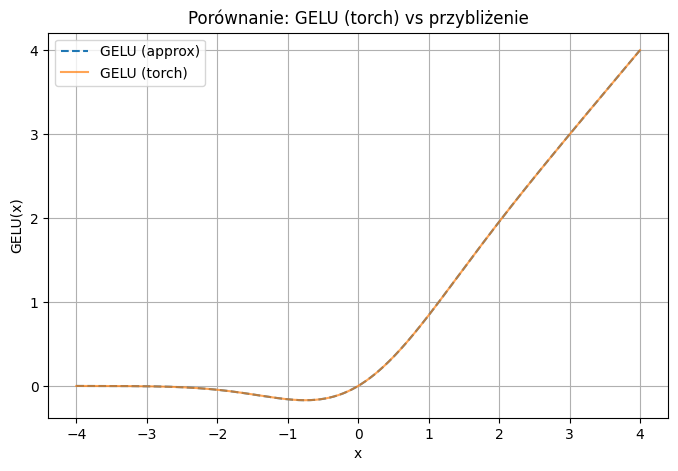

In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.linspace(-4, 4, steps=1000)

### TODO:
y_custom = ...
y_builtin = ...
###


plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y_custom.numpy(), label='GELU (approx)', linestyle='--')
plt.plot(x.numpy(), y_builtin.numpy(), label='GELU (torch)', alpha=0.7)
plt.title('Porównanie: GELU (torch) vs przybliżenie')
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.legend()
plt.grid(True)
plt.show()

#### Zadanie 3.
 - Z użyciem `PyTorch` policz gradient funkcji `GELU` dla `x = 1.5`.
 - Następnie wyświetl wykres gradientu

Nie korzystaj z wbudowanej funkcji, tylko policz ręcznie jak w poprzednim zadaniu.

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y_custom.numpy(), label='GELU (approx)', linestyle='--')
plt.plot(x.numpy(), y_builtin.numpy(), label='GELU (torch)', alpha=0.7)
plt.title('Porównanie: GELU (torch) vs przybliżenie')
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.legend()
plt.grid(True)
plt.show()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

<Figure size 800x500 with 0 Axes>

#### Zadanie 4.
 - Stwórz `TensorDataset` i `DataLoader` z `X_train` oraz `y_train`
 - Stwórz model (używając `torch.nn.Sequential`) o architekturze:
  * Warstwa wejściowa dopasowana do danych (`32` cechy wejściowe)
  * Warstwa w pełni połączona (`Linear`) z `16` neuronami i funkcją aktywacji `GELU`
  * Warstwa `Linear` z `8` neuronami i funkcja aktywacji `Tanh`
  * Warstwa `Linear` prowadząca do wyjścia (`1` klasa wyjściowa) i funkcja aktywacji `Sigmoid`
 - Wytrenuj ten model używając optimizera `torch.optim.Adam` i funkcji lossu `torch.nn.BCELoss()`
 - Śledź loss w trakcie treningu

Accuracy po 100 epokach powinno być około 90%

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(42)

X, y = make_classification(n_samples=1000, n_features=32, n_informative=20,
                           n_redundant=3, n_repeated=3, n_classes=2,
                           n_clusters_per_class=3, random_state=42)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.from_numpy(X_train_np).float()
y_train = torch.from_numpy(y_train_np).float().reshape(-1, 1)
X_test = torch.from_numpy(X_test_np).float()
y_test = torch.from_numpy(y_test_np).float().reshape(-1, 1)


with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    y_pred = (outputs > 0.5).float()

    accuracy = torch.sum(y_pred == y_test) / len(y_test)
    print(f"Accuracy on test set: {accuracy * 100:.2f}%")

### Zadanie 5. Trening MNIST-a

Napisz model, który osiąga co najmniej 95% accuracy na Mnist dataset (można go pobrać bezpośrednio w torchu). Celowo nie jest podany żaden kod.
